### 필요설치모듈

In [ ]:
!pip install seaborn

In [8]:
#사용함수
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [9]:
# json 읽어오기
reader=json.load(open('2.JSON자료\\혜화역출구전체_.json','r',encoding='utf-8'))
date_=reader['date']

In [10]:
#날짜데이터 년월일 만 추출하여 카운트 하기
date_2=[]
for i in date_:
    a=i[:10]
    date_2.append(a)

date_3=collections.Counter(date_2)

In [11]:
#딕셔너리 값 리스트로 나누기
list=[]
for i,j in date_3.items():
    list.append([i,j])

list

[['2019-11-12', 4],
 ['2021-10-17', 2],
 ['2020-07-16', 5],
 ['2019-08-30', 4],
 ['2020-12-23', 1],
 ['2019-08-26', 2],
 ['2017-12-30', 3],
 ['2020-11-29', 1],
 ['2021-10-18', 2],
 ['2021-10-16', 4],
 ['2021-10-13', 10],
 ['2021-10-12', 5],
 ['2021-10-11', 3],
 ['2021-10-09', 9],
 ['2021-09-30', 3],
 ['2021-09-29', 2],
 ['2021-09-28', 4],
 ['2021-09-23', 4],
 ['2021-09-18', 5],
 ['2021-09-16', 2],
 ['2021-09-12', 11],
 ['2021-09-11', 3],
 ['2021-09-10', 4],
 ['2021-09-09', 1],
 ['2021-09-08', 3],
 ['2021-09-06', 2],
 ['2021-09-04', 5],
 ['2021-08-31', 3],
 ['2021-08-27', 5],
 ['2021-08-22', 4],
 ['2021-08-21', 3],
 ['2021-08-18', 2],
 ['2021-08-16', 2],
 ['2021-08-15', 1],
 ['2021-08-14', 4],
 ['2021-08-06', 2],
 ['2021-08-05', 5],
 ['2021-08-04', 1],
 ['2021-08-03', 2],
 ['2021-07-27', 2],
 ['2021-07-23', 1],
 ['2021-07-20', 5],
 ['2021-07-19', 2],
 ['2021-07-18', 4],
 ['2021-07-16', 5],
 ['2021-07-13', 2],
 ['2021-07-07', 2],
 ['2021-07-06', 2],
 ['2021-07-03', 1],
 ['2021-07-02', 2]

In [12]:
#테이블 생성하기
table = pd.DataFrame(list,columns=['dates','cnt'])
# table.head()

#테이블 날짜 부분 나누기
table.dates=pd.to_datetime(table.dates,format='%Y-%m-%d')
table['year']=table.dates.dt.year
table['month']=table.dates.dt.month
table['days']=table.dates.dt.day
table.head()

df=table.pivot(['year','month'],'days','cnt')
df

days          1    2    3    4    5    6    7    8    9     10  ...   22   23  \
year month                                                      ...             
2013 10      NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN  ...  NaN  NaN   
2014 4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...  NaN  NaN   
     5       NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN  ...  NaN  NaN   
     7       NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN   NaN  ...  NaN  NaN   
     8       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  ...  NaN  NaN   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
2021 6      14.0  2.0  3.0  NaN  2.0  2.0  4.0  2.0  NaN  10.0  ...  2.0  2.0   
     7       NaN  2.0  1.0  4.0  1.0  2.0  2.0  3.0  NaN   1.0  ...  2.0  1.0   
     8       2.0  NaN  2.0  1.0  5.0  2.0  1.0  1.0  5.0   1.0  ...  4.0  1.0   
     9       NaN  7.0  2.0  5.0  3.0  2.0  1.0  3.0  1.0   4.0  ...  3.0  4.0   
     10      3.0  3.0  7.0  1.0  3.0  3.0  4.0  1.0  9.0   1.0  ...  NaN  NaN   

days         24   25   26    27   28   29   30   31  
year month                                           
2013 10     NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  
2014 4      NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  
     5      NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  
     7      NaN  NaN  NaN   1.0  NaN  NaN  NaN  NaN  
     8      NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...   ...  ...  ...  ...  ...  
2021 6      5.0  4.0  1.0  11.0  1.0  NaN  1.0  NaN  
     7      NaN  3.0  NaN   2.0  2.0  5.0  NaN  1.0  
     8      4.0  2.0  1.0   5.0  2.0  2.0  1.0  3.0  
     9      5.0  3.0  1.0   4.0  4.0  2.0  3.0  NaN  
     10     NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  

[91 rows x 31 columns]

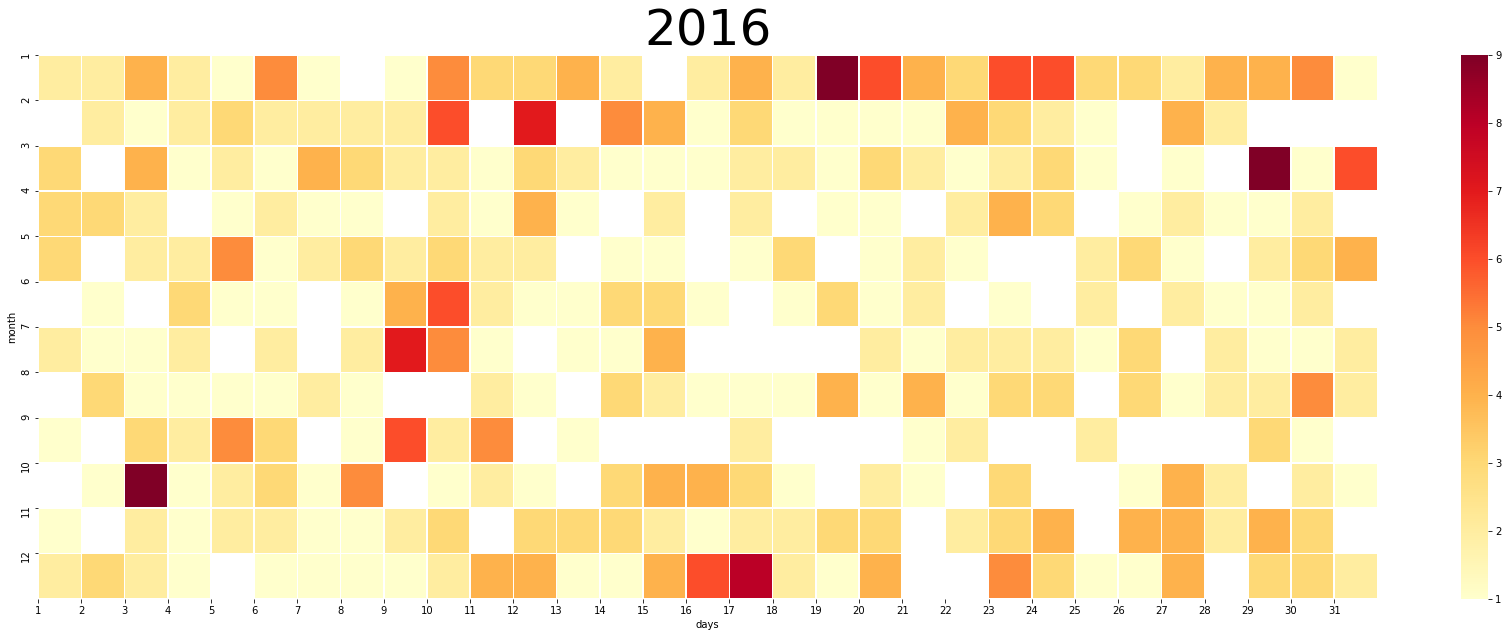

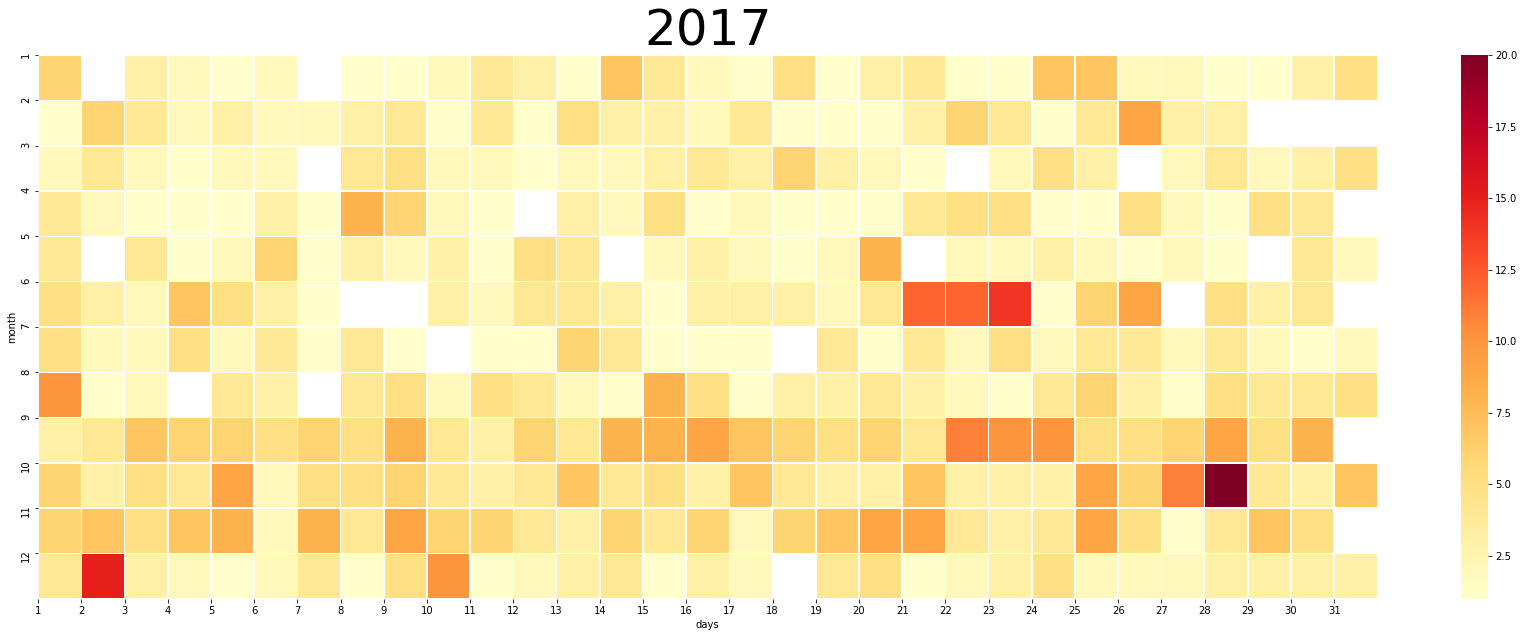

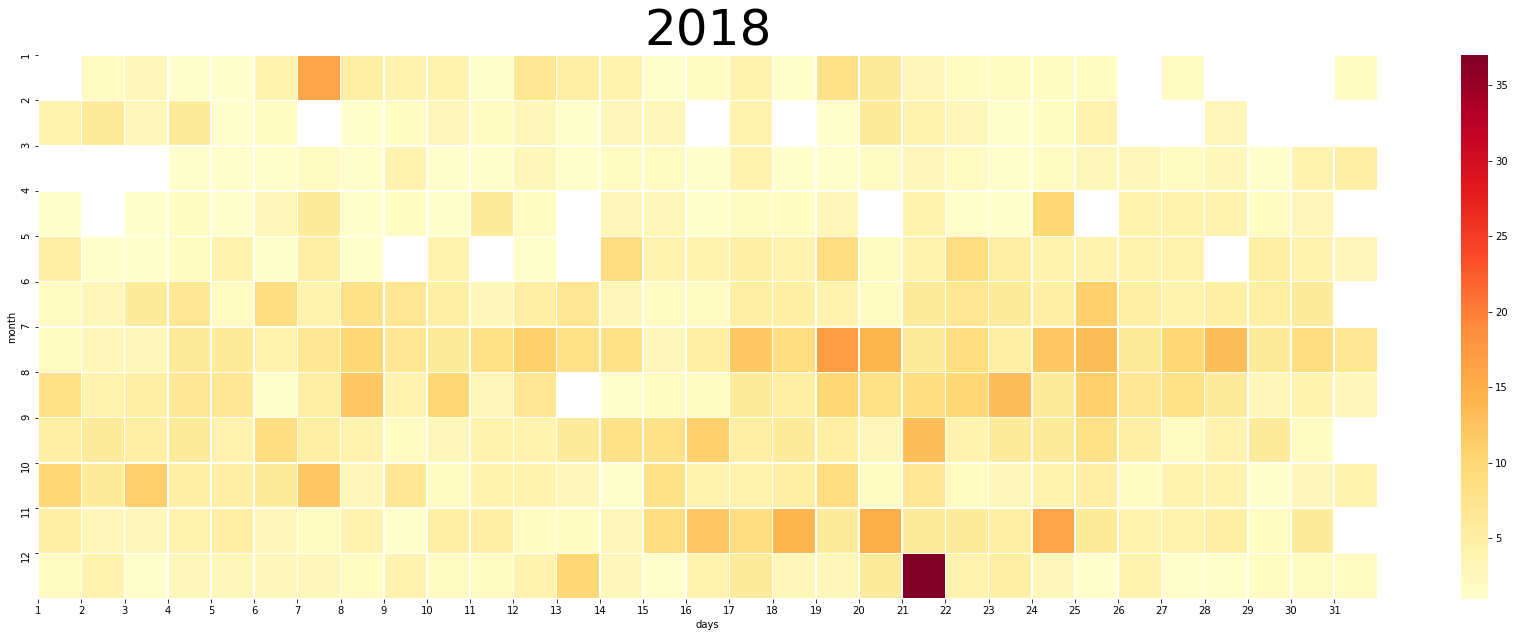

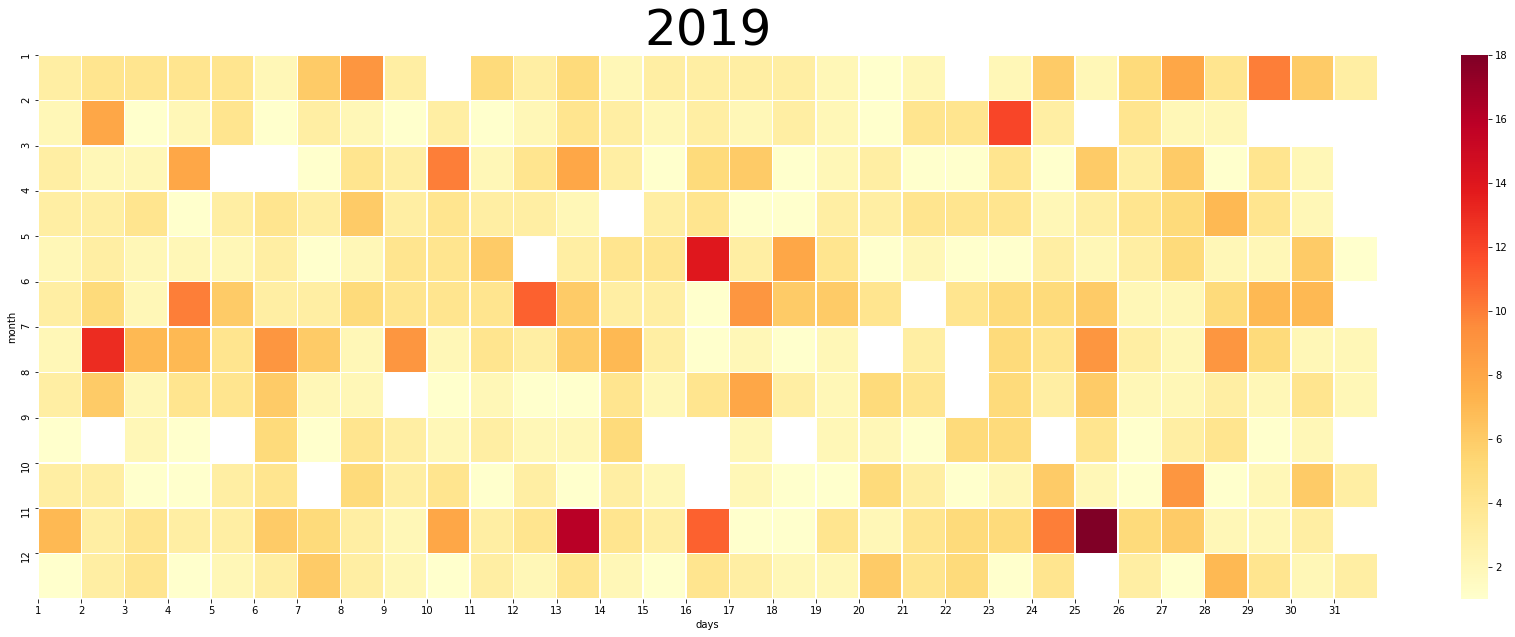

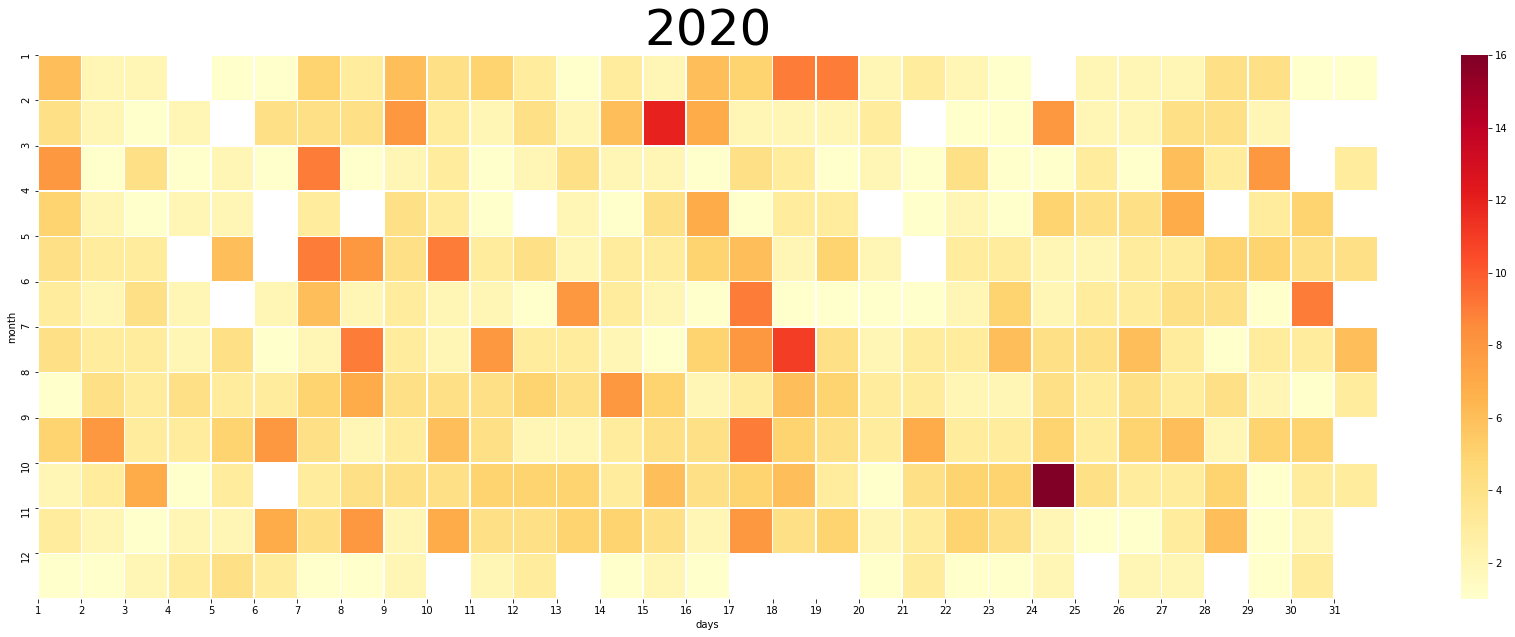

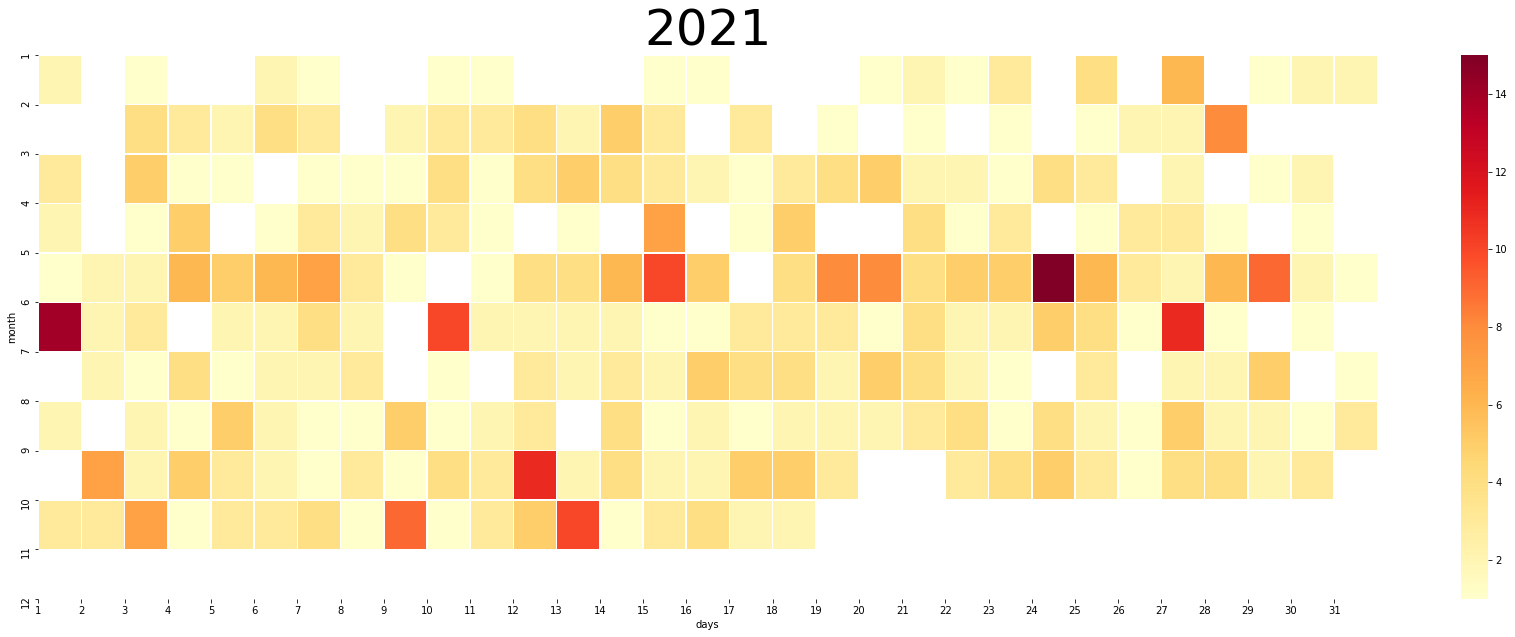

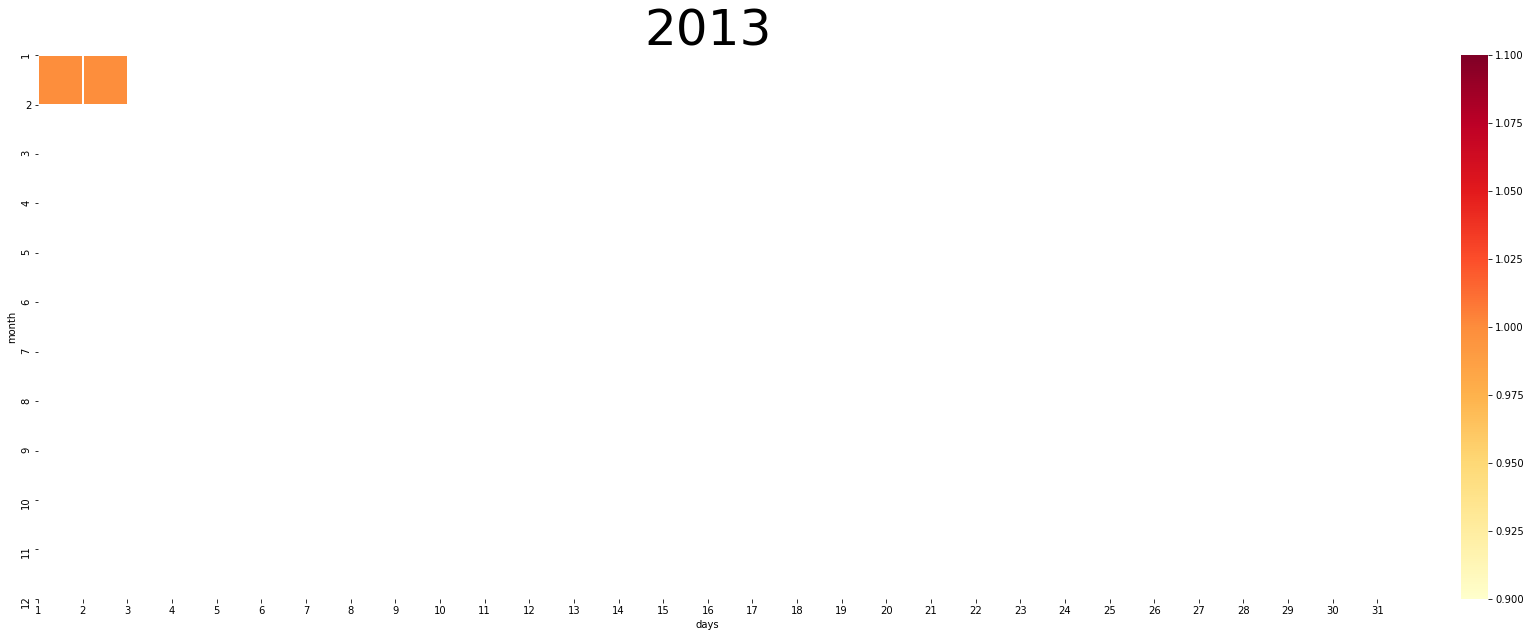

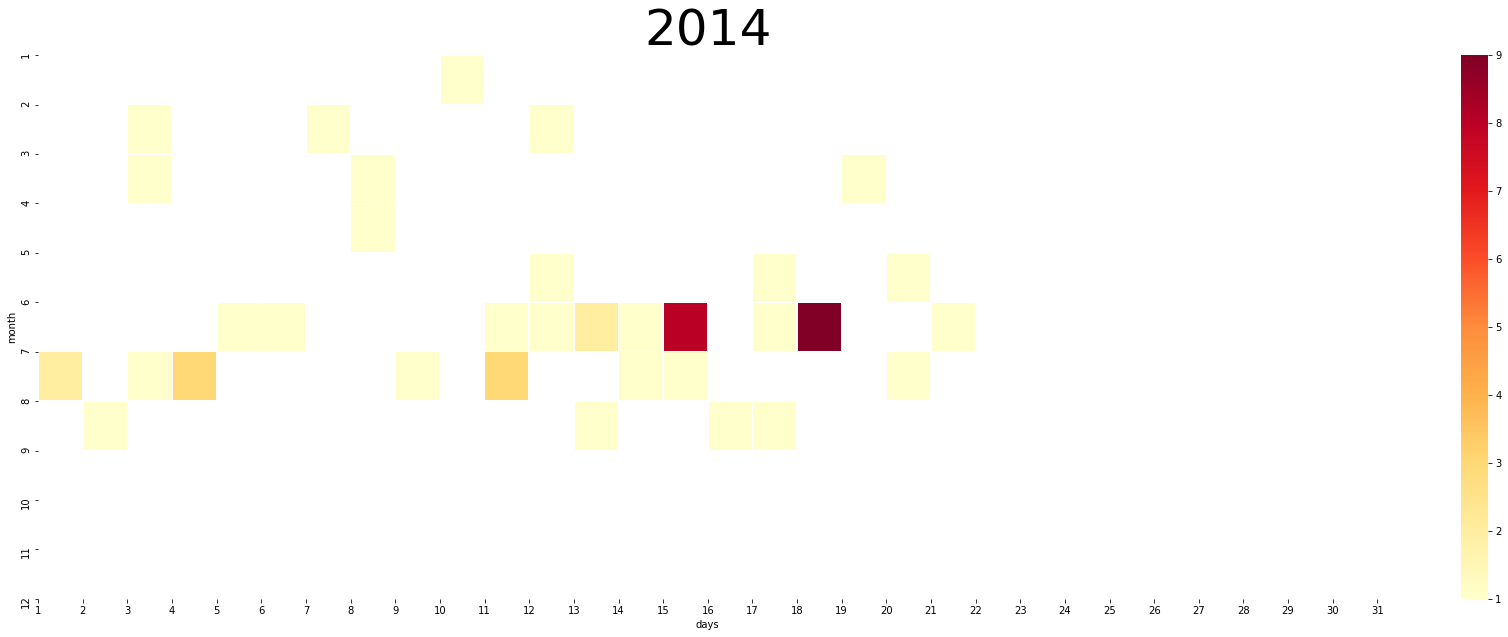

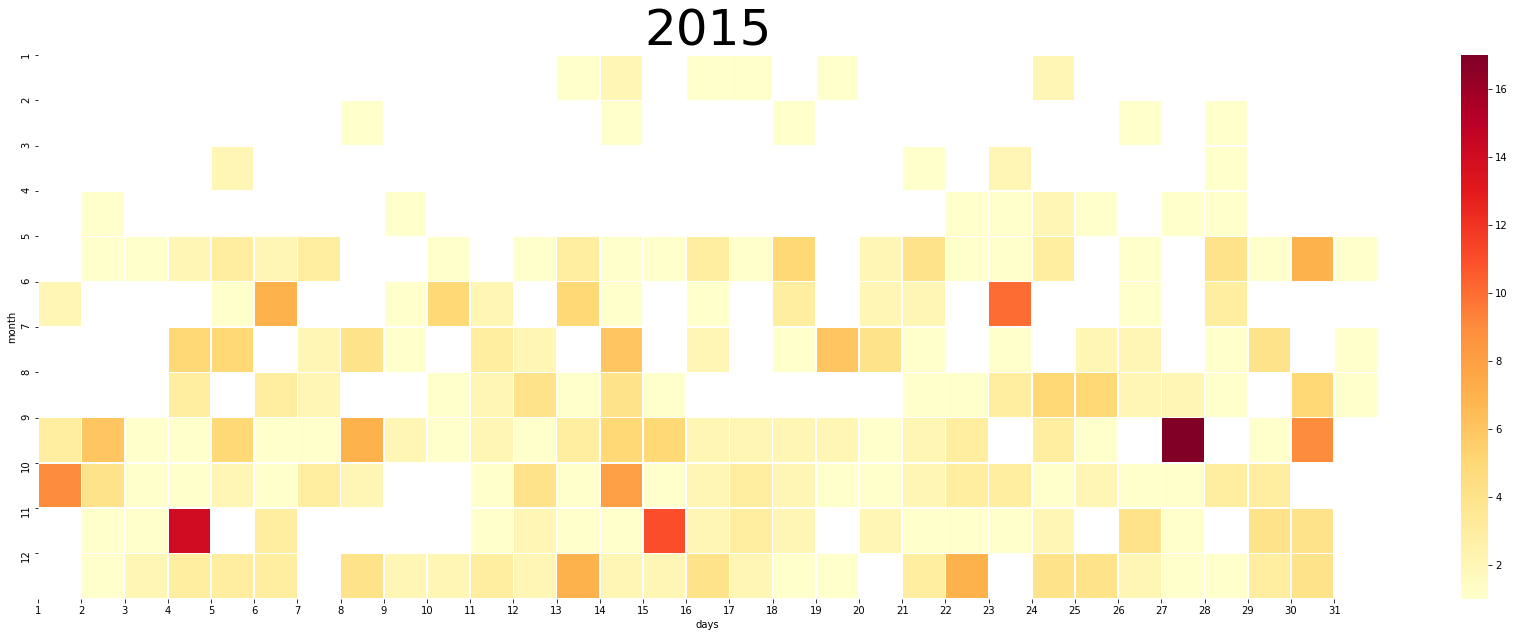

In [17]:
#년도별로 히트맵 시각화하기
for i in set(table['year']):
    fig = plt.figure(figsize=(30,10)) #크기 조절
    fig.set_facecolor('white')#내부 색
    
    #해당 년도 테이블 만들기
    df_year= table['year'] == i
    dy=table[df_year]
    table_dy=dy.pivot('month','days','cnt')
    
    #히트맵으로 시각화하기
    sns.heatmap(table_dy,cmap='YlOrRd',linewidths=0.5)
    plt.xticks(np.arange(0, 31),set(table['days'])) ## x축 눈금 생성
    plt.yticks(np.arange(0, 12),set(table['month'])) ## y축 눈금 생성
    plt.title('{}'.format(i) ,fontsize=50 ) #제목과 제목폰트크기
    plt.savefig(f"혜화역_히트맵_{i}.png", bbox_inches="tight")
plt.show()

# 한번에 출력

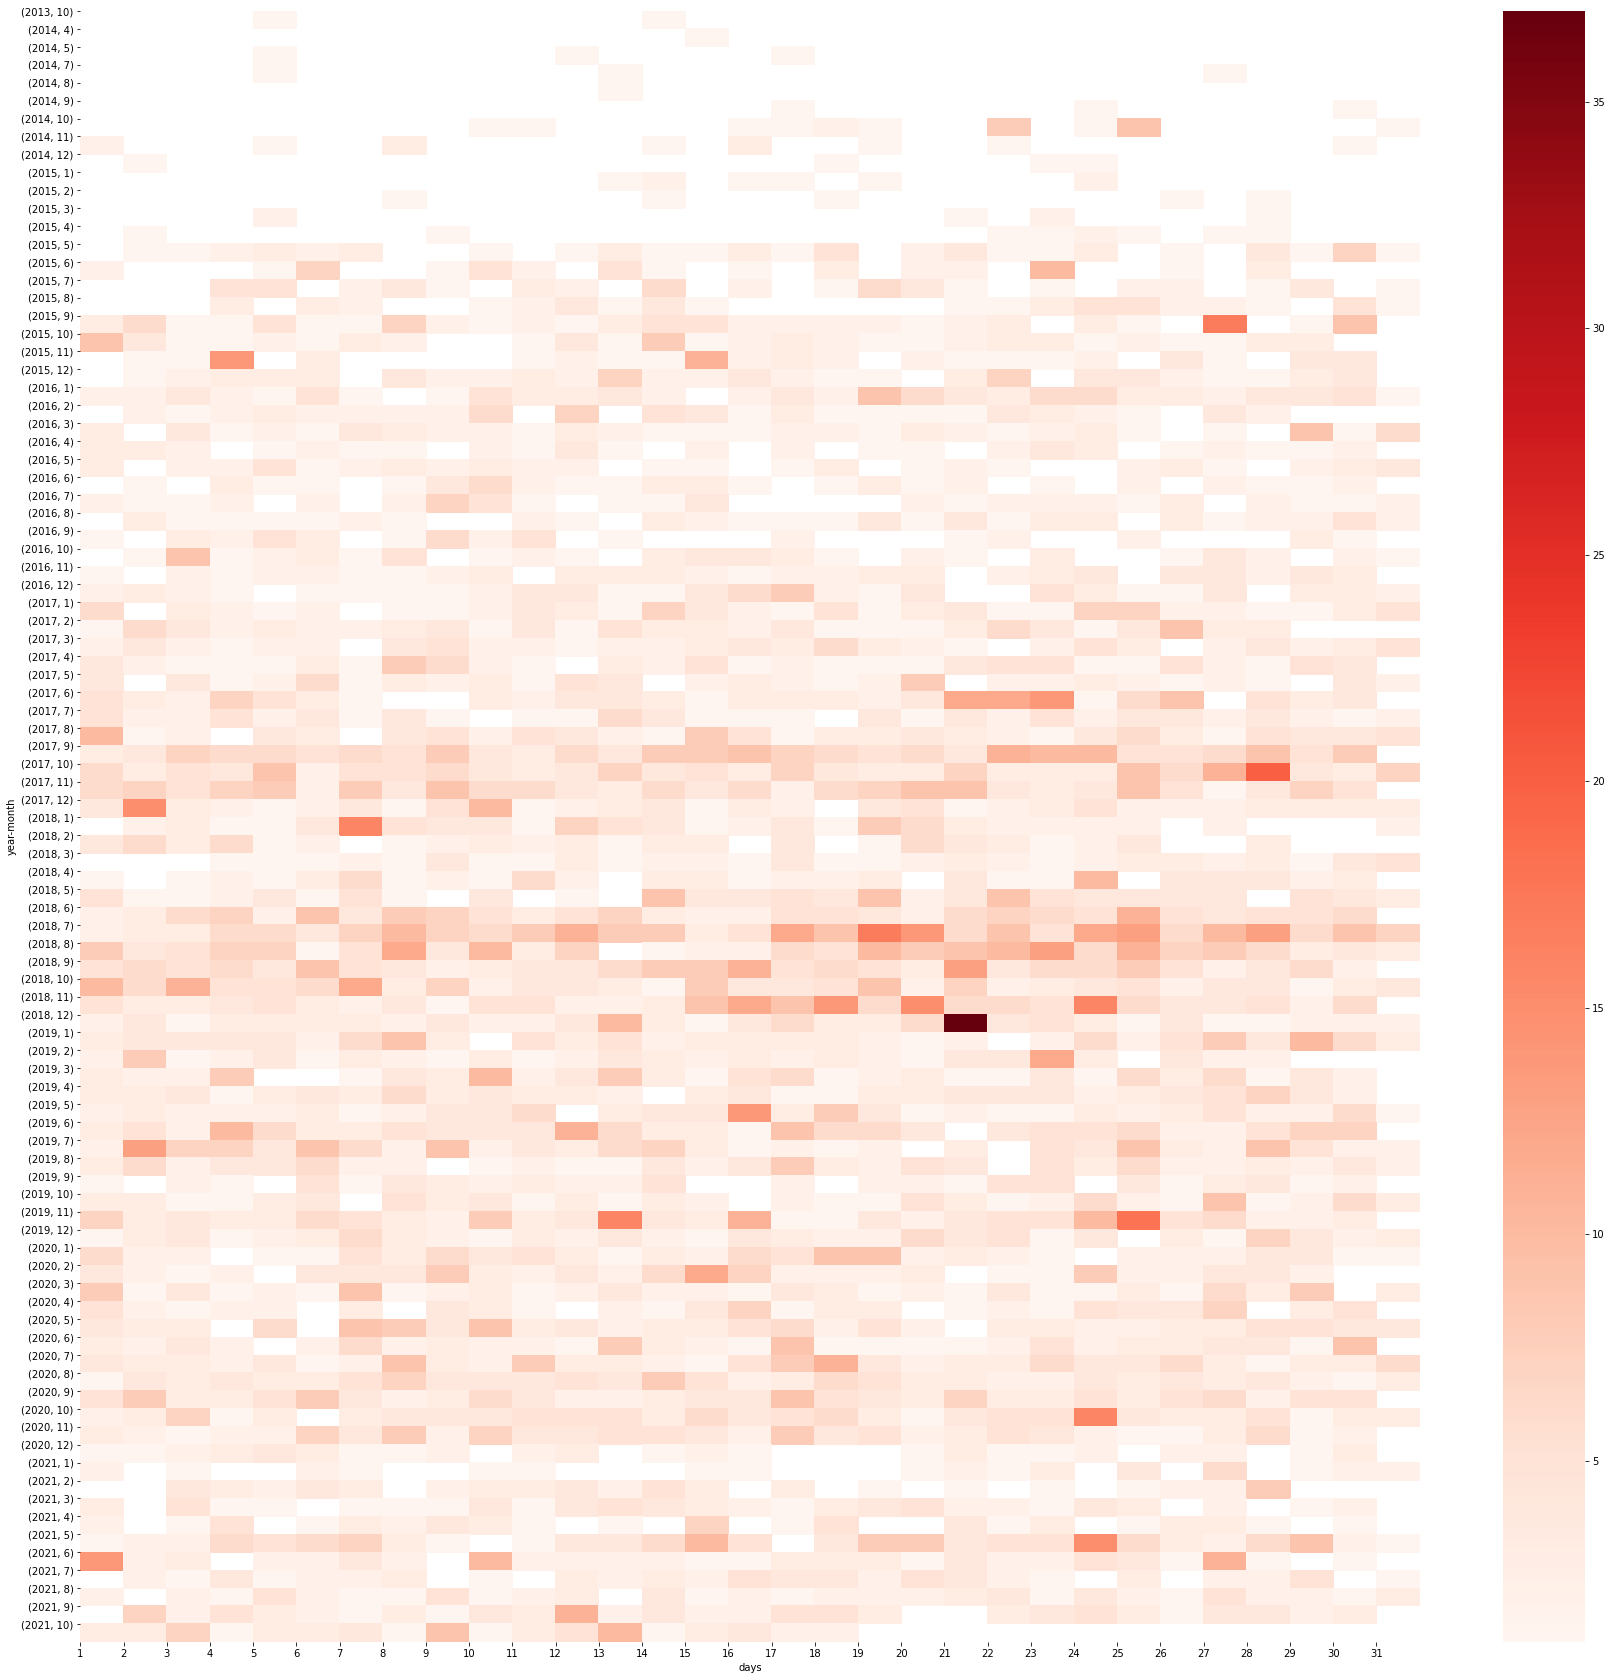

In [16]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
 
sns.heatmap(df,cmap='Reds')
plt.xticks(range(len(df.columns)),df.columns) ## x축 눈금 생성
plt.yticks(range(len(df.index)), df.index) ## y축 눈금 생성
 
plt.show()